Building a model that would Predict employers' salary for the HR Department

# Question
In exercise folder (same level as this notebook on github) there is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [1]:
#importing our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# reading our dataset
df2 = pd.read_csv('hiring.csv')
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
# installing string converter
!pip install word2number

In [8]:
# filling the Nan values with 'zero'
df2['experience'] = df2['experience'].fillna('zero')
df2['experience'].value_counts()

zero      2
five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: experience, dtype: int64

In [9]:
# checking if our filling it's reflected
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
# checking the statistics of our dataset
df2.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [11]:
# filling the Nan values in 'test_score(out of 10)' column using the median value
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(8.0)
df2['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [12]:
# checking if our filling it's reflected in our dataset
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [13]:
# converting experience column from string to number
from word2number import w2n
df2['experience'] = df2['experience'].apply(w2n.word_to_num)


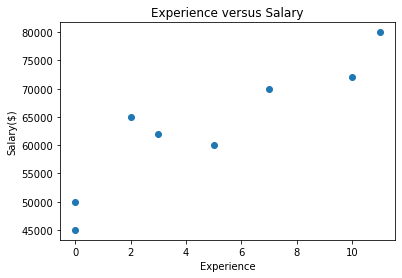

In [38]:
# A plot showing the relationship between years of experience and salary
plt.scatter(x=df2['experience'], y=df2['salary($)'])
plt.xlabel('Experience')
plt.ylabel('Salary($)')
plt.title('Experience versus Salary');

In [32]:
# correlation coefficient between experience and salary
df2['experience'].corr(df2['salary($)'])

0.9080170601800082

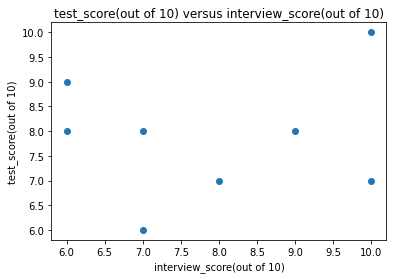

In [41]:
# the relationship between test score and interview score
plt.scatter(x=df2['interview_score(out of 10)'], y=df2['test_score(out of 10)'])
plt.xlabel('interview_score(out of 10)')
plt.ylabel('test_score(out of 10)')
plt.title('test_score(out of 10) versus interview_score(out of 10)');

In [42]:
# correlation coefficent between test score and interview score
df2['test_score(out of 10)'].corr(df2['interview_score(out of 10)'])

0.13087092110323353

In [22]:
# instantiating our linear model
model = LinearRegression()
model.fit(df2[['experience','test_score(out of 10)','interview_score(out of 10)']], df2['salary($)'])

LinearRegression()

In [23]:
model.predict(X_train).round(0)

array([52350., 45734., 58313., 63873., 67271., 61148., 76069., 79242.])

In [24]:
# predicting our model using the first question
salary_predict = model.predict([[2,9,6]]).round(0)
salary_predict

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53206.])

In [25]:
# predicting our model using the second question
salary_predict = model.predict([[12,10,10]]).round(2)
salary_predict

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18])

In [27]:
# getting our intercept
intercept = model.intercept_.round(0)
intercept

17737.0

In [28]:
# getting our coefficient
coefficient = model.coef_.round(0)
coefficient

array([2813., 1846., 2205.])

In [44]:
# checking if our prediction aligns with our equation 
# imputing our equation for the first question
#salary = M1*X1 + M2*X2 + M3*X3 + b 
salary = round((coefficient[0] * 2 ) + (coefficient[1] * 9) + (coefficient[2] * 6 ) + intercept, 0)
salary

53207.0

In [45]:
# imputing our equation for the second question
salary = round((coefficient[0]  * 12) + (coefficient[1]* 10) + (coefficient[2] * 10) + intercept, 0)
salary

92003.0